Change directory and mount drive

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
# cd into the independent project folder
#cd /content/drive/My Drive/FourthBrain/independent project

In [3]:
# TRIED TO DOWNLOAD THE DATA SET DIRECTLY FROM KAGGLE BUT IT KEPT ON TIMING OUT

# ! pip install -q kaggle
#from google.colab import files
#files.upload()
#! mkdir ~/.kaggle (using the one in .kaggle instead)
#! cp kaggle.json  ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets list

#! mv *.jpg data/
#!cd data
#!kaggle competitions download -c state-farm-distracted-driver-detection 
# download the data (about 4GB... good thing i have 100GB), but keeps on timing out so downloading from website
# updating kaggle (also how do i run in an venv instead of from root?)
#!pip uninstall -y kaggle
#!pip install --upgrade pip
#!pip install kaggle==1.5.6


# downloaded zip
#!kaggle competitions download -c state-farm-distracted-driver-detection  
# unzip file: 
# !unzip "/content/drive/My Drive/FourthBrain/independent project/data/state-farm-distracted-driver-detection.zip" -d "/content/drive/My Drive/FourthBrain/independent project/data/statefarm"
# manually removed zip file from drive
# NOT SHOWING UP!!

Running locally, files are in the same folder

In [1]:
dataFolder = 'data/state-farm-distracted-driver-detection/'
# Note: data folder not uploaded to github

Trying to familiarize myself with the data:

1. Looking at csv file with all the labels for training data
2. Adding filepath of images to dataframe


In [2]:
import pandas as pd
import numpy as np

In [3]:
csv_filename = 'data/state-farm-distracted-driver-detection/driver_imgs_list.csv'
df = pd.read_csv(csv_filename)
print(df)

      subject classname            img
0        p002        c0  img_44733.jpg
1        p002        c0  img_72999.jpg
2        p002        c0  img_25094.jpg
3        p002        c0  img_69092.jpg
4        p002        c0  img_92629.jpg
...       ...       ...            ...
22419    p081        c9  img_56936.jpg
22420    p081        c9  img_46218.jpg
22421    p081        c9  img_25946.jpg
22422    p081        c9  img_67850.jpg
22423    p081        c9   img_9684.jpg

[22424 rows x 3 columns]


Get image paths and also change the class name to an integer

In [4]:
# images of safe driving (going to try to load the first image)
#classname = 'c0'
#filenames = df[df['classname'] == classname]['img']

# training images are in a special folder structure
def get_img_path(classname, filename):
  return 'data/state-farm-distracted-driver-detection/imgs/train/' + classname + '/' + filename

# make sure it works:
# print(get_img_path(classname, filenames[1]))
df['img_path'] = get_img_path(df['classname'], df['img'])
df['class']=df['classname'].apply(lambda x: int(x[1]))
df.head()

,subject,classname,img,img_path,class
0,p002,c0,img_44733.jpg,data/state-farm-distracted-driver-detection/im...,0
1,p002,c0,img_72999.jpg,data/state-farm-distracted-driver-detection/im...,0
2,p002,c0,img_25094.jpg,data/state-farm-distracted-driver-detection/im...,0
3,p002,c0,img_69092.jpg,data/state-farm-distracted-driver-detection/im...,0
4,p002,c0,img_92629.jpg,data/state-farm-distracted-driver-detection/im...,0


Experiment with reading in the image data (many ways to do this)

https://www.pluralsight.com/guides/importing-image-data-into-numpy-arrays

In [8]:
df.iloc[0,3] # first image in the dataframe

'data/state-farm-distracted-driver-detection/imgs/train/c0/img_44733.jpg'

In [5]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image

In [10]:
#mydir = pwd
im_test = load_img(df.iloc[0,3]) # unzipped files are not showing up in google drive... maybe wait a bit

In [11]:
# try getting the test images instead 
#img_file = 'data/state-farm-distracted-driver-detection/imgs/test/img_13953.jpg'
#imag
#imtest = load_img(img_file) # this is taking forever!
imarray = img_to_array(im_test)
imarray.shape

(480, 640, 3)

In [12]:
# also try reading using PIL lib

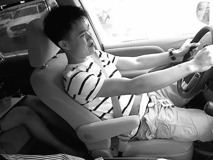

In [13]:
gryscale = Image.open(df.iloc[0,3]).convert('L') # grayscale # Taking forever because there are thousands of files in the drive! 
# gryscale.resize((320,240)) # scale down by 1/2
resize_dims = tuple([int(x/3) for x in (gryscale.size)])
gryscale.resize(resize_dims) # note: not resizing in place, gryscale still original size

In [14]:
# convert to numpy array
np.array(gryscale)
# convert img to row vector
np.array(gryscale).reshape(1,np.array(gryscale).size) 

array([[27, 28, 28, ..., 52, 51, 46]], dtype=uint8)

# Function to take in a filepath and output a rescaled image in grayscale as a vector

In [6]:
def img2vec(filepath, resize_scale=3, gray_scale=True):
  '''
  Loads image, converts to grayscale, downsamples by resize_scale and returns a row vector 
  To keep color image, set gray_scale = True 
  To keep the original size of the image, set resize_scale= 1
  '''
  im = Image.open(filepath)
  if gray_scale:
    im = im.convert('L')
  if resize_scale > 1:
    resize_dims = tuple([int(x/resize_scale) for x in (im.size)])
    im = im.resize(resize_dims)
  return np.array(im).reshape(1, np.array(im).size)
    

Load all the test images into a numpy array

In [7]:
train_images = df['img_path'].values # all the filenames
train_targets = df['class'].values   # all the class targets 
train_array = []
# go through all the file names in a loop (should be a better way of doing this)
# call img2vec to downscale images and convert them to vectors (stores in a list)
# gives output every 1000 files, so that user knows it's working
for i, img in enumerate(train_images):
    if i%1000  == 0:
        print(f"adding {img}, i={i}")
    train_array.append(np.ravel(img2vec(img)))
# convert list to numpy array    
train_array = np.array(train_array)    

adding data/state-farm-distracted-driver-detection/imgs/train/c0/img_44733.jpg, i=0
adding data/state-farm-distracted-driver-detection/imgs/train/c3/img_98718.jpg, i=1000
adding data/state-farm-distracted-driver-detection/imgs/train/c4/img_29411.jpg, i=2000
adding data/state-farm-distracted-driver-detection/imgs/train/c6/img_69390.jpg, i=3000
adding data/state-farm-distracted-driver-detection/imgs/train/c6/img_39358.jpg, i=4000
adding data/state-farm-distracted-driver-detection/imgs/train/c4/img_93192.jpg, i=5000
adding data/state-farm-distracted-driver-detection/imgs/train/c3/img_29731.jpg, i=6000
adding data/state-farm-distracted-driver-detection/imgs/train/c1/img_23637.jpg, i=7000
adding data/state-farm-distracted-driver-detection/imgs/train/c9/img_5799.jpg, i=8000
adding data/state-farm-distracted-driver-detection/imgs/train/c7/img_36717.jpg, i=9000
adding data/state-farm-distracted-driver-detection/imgs/train/c8/img_30792.jpg, i=10000
adding data/state-farm-distracted-driver-detec

In [12]:
train_array.shape

(22424, 34080)

In [13]:
train_targets.shape

(22424,)

test, train split for cross validation

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xcv, ytrain, ycv = train_test_split(train_array, train_targets, test_size=0.3, random_state=42)

In [15]:
xtrain.shape

(15696, 34080)

In [28]:
ytrain.shape

(15696,)

# make a pipeline : PCA, SVC 

(following week2: 2_4 SupportVectorMachines to start)

In [9]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [11]:
# initiate pipeline (using parameters from week 2: 2_4 Support Vector Machines to start)
mypca = PCA(n_components=150, whiten=True, random_state= 42)
mysvm = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(mypca, mysvm)

# Do a grid search to find best parameters for SVM

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
# Instantiate the grid search with the model and parameter grid
grid = GridSearchCV(estimator=model, param_grid=param_grid)
# Train the grid of models. Time this process. 
#cant figure out timing jupyter notebook ... 

In [23]:
grid.fit(xtrain, ytrain)
# Print the parameters which yield the bes t model performance

GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [1, 5, 10, 50],
                         'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]})

In [24]:
grid.best_params_

{'svc__C': 10, 'svc__gamma': 0.005}

In [31]:
param_grid2 = {'svc__C': [7, 10, 20],
              'svc__gamma': [0.001, 0.005, 0.01]}
grid2 = GridSearchCV(estimator=model, param_grid=param_grid2)

In [32]:
grid2.fit(xtrain, ytrain)


GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [7, 10, 20],
                         'svc__gamma': [0.001, 0.005, 0.01]})

In [33]:
grid2.best_params_

{'svc__C': 7, 'svc__gamma': 0.01}

In [35]:
grid2.cv_results_

{'mean_fit_time': array([34.42013206, 39.15212703, 43.99255443, 35.94668508, 37.33011456,
        41.21972618, 35.76875534, 37.36642261, 40.4997695 ]),
 'std_fit_time': array([4.88976216, 3.71937844, 1.87218547, 1.14039668, 0.15660696,
        1.3441131 , 1.52747737, 0.37532507, 2.4986693 ]),
 'mean_score_time': array([4.29605656, 4.89165106, 5.72707424, 3.27914796, 4.00371032,
        4.83448143, 3.1603096 , 4.03573732, 4.76873941]),
 'std_score_time': array([1.01394309, 0.68928955, 0.51309278, 0.03586058, 0.03286132,
        0.23018535, 0.07270572, 0.0480063 , 0.19137199]),
 'param_svc__C': masked_array(data=[7, 7, 7, 10, 10, 10, 20, 20, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_svc__gamma': masked_array(data=[0.001, 0.005, 0.01, 0.001, 0.005, 0.01, 0.001, 0.005,
                    0.01],
              mask=[False, False, False, False, False, False, False, F

In [36]:
grid.cv_results_

{'mean_fit_time': array([53.3583673 , 41.9214962 , 39.25820985, 43.0474206 , 46.01005502,
        37.29286909, 36.26876354, 37.34005256, 39.04579468, 35.933711  ,
        35.29462371, 36.10464025, 36.89422722, 35.18856654, 35.14670253,
        35.60599804]),
 'std_fit_time': array([1.5029856 , 0.56173989, 1.20724126, 2.75533562, 3.16994416,
        0.41878982, 0.29816882, 0.07454185, 0.31027594, 0.28300834,
        0.09780072, 0.61545237, 1.337719  , 0.18266534, 0.36128707,
        0.1190501 ]),
 'mean_score_time': array([9.14877048, 6.99422317, 5.5768466 , 6.03125944, 7.68029232,
        4.347014  , 3.70886655, 4.03073387, 5.81397328, 3.61297259,
        3.20258555, 4.02444539, 3.71719012, 3.25894399, 2.97545481,
        4.00314031]),
 'std_score_time': array([0.40923743, 0.27361034, 0.03670896, 1.16443241, 0.89055151,
        0.0458389 , 0.10428379, 0.03917354, 0.28519108, 0.04676823,
        0.02872902, 0.04517886, 0.13408551, 0.67900511, 0.02857599,
        0.03697716]),
 'param_sv

Even though the second fit says that the best model is C= 7 and Gamma = .01, this is not much of an improvement from C=10 and Gamma = 0.005:

C=7, Gamma=0.01 :  mean_test_score :  0.99413865 and std_test_score =  0.00032466

C=10,Gamma=0.005: mean_test_score :  0.99413863 and std_test_score =  0.00025504

The mean test score is better at the 8th significant digit, but the std_test_score isworse on the 1st significant digit. So picking :

C=10, Gamma = 0.005



In [10]:
mypca = PCA(n_components=150, whiten=True, random_state= 42)
mysvm = SVC(kernel='rbf', C=10, gamma=0.005, class_weight='balanced')
model = make_pipeline(mypca, mysvm)

Fit the model on the training data

In [13]:
model.fit(xtrain, ytrain)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(C=10, class_weight='balanced', gamma=0.005))])

get predictions for cross validation data

In [15]:
ypred_cv = model.predict(xcv)

see  how the model did on the cross validation data

https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [17]:
from sklearn.metrics import confusion_matrix, f1_score, multilabel_confusion_matrix, accuracy_score

array([[731,   0,   0,   1,   1,   0,   0,   0,   1,   1],
       [  0, 693,   0,   0,   0,   0,   0,   1,   0,   0],
       [  0,   0, 689,   0,   0,   0,   1,   0,   1,   0],
       [  2,   0,   0, 703,   1,   0,   0,   0,   0,   0],
       [  1,   2,   0,   1, 702,   0,   0,   0,   0,   0],
       [  3,   0,   0,   0,   1, 689,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0, 728,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0, 592,   1,   0],
       [  0,   0,   1,   0,   0,   0,   0,   1, 563,   3],
       [  2,   1,   1,   0,   0,   0,   0,   0,   4, 604]], dtype=int64)

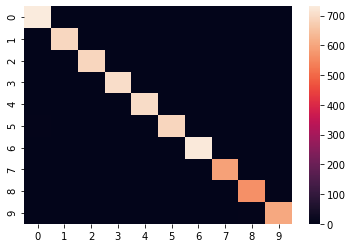

In [23]:
import seaborn as sns
sns.heatmap(confusion_matrix(ycv,ypred_cv))
confusion_matrix(ycv, ypred_cv)

In [25]:
accuracy_score(ycv, ypred_cv)

0.9949464922711059

In [27]:
multilabel_confusion_matrix(ycv, ypred_cv)

array([[[5984,    9],
        [   4,  731]],

       [[6031,    3],
        [   1,  693]],

       [[6035,    2],
        [   2,  689]],

       [[6020,    2],
        [   3,  703]],

       [[6018,    4],
        [   4,  702]],

       [[6035,    0],
        [   4,  689]],

       [[5998,    1],
        [   1,  728]],

       [[6132,    2],
        [   2,  592]],

       [[6153,    7],
        [   5,  563]],

       [[6112,    4],
        [   8,  604]]], dtype=int64)

In [32]:
print(f1_score(ycv, ypred_cv, average='micro')) # total number across labels
print(f1_score(ycv, ypred_cv,average='macro')) # averaged over labels

0.9949464922711059
0.9948191095816931


# Seems to have done pretty good: 
# Now let's check out how the model learned
look at how the model does for various training sizes 
(ie the Learning Curve)
Let's define the model again:
with new paramters : C=10, Gamma = 0.005

In [87]:
mypca = PCA(n_components=150, whiten=True, random_state= 42)
mysvm = SVC(kernel='rbf', C=10, gamma=0.005, class_weight='balanced')
model = make_pipeline(mypca, mysvm)

I want to make the training examples balanced so writing a function to take out a random subsample of X samples where X is divisible by the no of classes(10)

In [77]:
# Just for testing out
# class_idx = np.where(ytrain == 4)
# idx_idx = np.random.choice(class_idx[0], size = 2, replace = False)
# ytrain[idx_idx];
# xtrain[idx_idx,:];


In [80]:
def random_subsample(X, y, n):
    '''
    randomly subsamples data from X,y, picking out n samples per class 
    '''
    
    def get_class_index(y,n,classId):
        # gets n random indices for the class
        class_idx = np.where(y == classId)
        rand_idx = np.random.choice(class_idx[0], size=n, replace=False)
        return rand_idx
    
    classes = np.unique(ytrain)
    all_indices = [get_class_index(y,n,c) for c in classes]
    all_indices = np.concatenate(all_indices)
    return (X[all_indices,:], y[all_indices])
        
    

Since we're going to be limited by the test/train split, let's split the data in 1/2 for this experiment

In [86]:
xtrain, xtest, ytrain, ytest = train_test_split(train_array, train_targets, test_size=0.5, random_state=42)

In [98]:
for n in [15]: #np.arange(1,700, 50): # needs to be at least 15 bc 
    xn, yn = random_subsample(xtrain, ytrain, n)
    xn_cv, yn_cv = random_subsample(xtest, ytest, n)
    this_model = model
    this_model.fit(xn, yn)

not sure... how to get out the J(theta), training loss ...

# Scratch that, scikit learn has "Learning Curve"

In [101]:
# go back to 30% split, this way we can also do more tests on the "test set" still from the trianing data
# note that the actual test set (which does not have labels) has still not entered the picture
xtrain, xtest, ytrain, ytest = train_test_split(train_array, train_targets, test_size=0.3, random_state=42)

In [103]:
from sklearn.model_selection import learning_curve